In [134]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math
import sys
import copy
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') 
from zipfile import ZipFile 
import tensorflow as tf
from tensorflow import keras




In [135]:

data = pd.read_csv('homeprices.csv')
data['area']= data['area']/data['area'].max()
data['bedrooms']= data['bedrooms']/data['bedrooms'].max()
data.head()

,area,bedrooms,price
0,0.285405,0.4,39.07
1,0.702703,0.8,120.00
2,0.389189,0.6,62.00
3,0.411081,0.6,75.00
4,0.324324,0.4,51.00


In [140]:
X_train , X_test, Y_train , Y_test = train_test_split(data[['area' , 'bedrooms']] , data['price']  , random_state = 0)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test) 
 

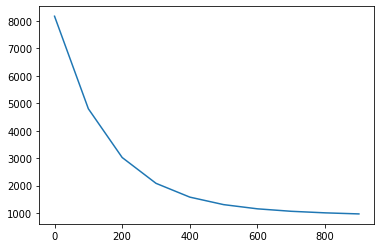

In [145]:
# batch gradient descent



cost_list =[]
epochs_list = []
def batch_gradient_descent(X,Y_true , epochs  ,learning_rate =0.01):
    number_of_features = X.shape[1]
    w= np.ones(shape = (number_of_features))
    b=0
    n = len(X)
    
    
    for i in range(epochs):
        Y_pred = np.dot(w ,X_train.T)+b
        w_grad = -(2/n)*(X.T.dot(Y_true-Y_pred))
        b_grad = -(2/n)*np.sum(Y_true-Y_pred)
        
        w =w-learning_rate*w_grad
        b =b-learning_rate*b_grad

        cost = np.mean(np.square(Y_true-Y_pred))
        if i%100==0: 
            cost_list.append(cost)
            epochs_list.append(i)
            
    return w,b,cost
        
    
w , b ,cost= batch_gradient_descent(X_train ,Y_train ,1000,0.001)
plt.plot(epochs_list ,cost_list)




In [149]:
def predict(area ,bedrooms , w,b):
    area =np.array(area)
    bedrooms =np.array(bedrooms)
    area = area/area.max()
    bedrooms = bedrooms/bedrooms.max()
    
    
    result = w[0]*area+w[1]*bedrooms+b
    print(result)
    for i in  range(0,len(result)):
        mini = Y_test[0]

        for x in Y_test:
            if abs(x-result[i])<=abs(mini-result[i]):
                mini = x
        result[i] =  mini 
    return result
    
prediction  = predict(X_test[: ,0] ,X_test[:,1]  , w,b) 

print(prediction)
print(Y_test)

[105.32322741 112.24319126  60.47119466  85.722503    92.30082832]
[102. 120.  50.  82. 102.]
[102. 120.  32.  50.  82.]


8266.056136186999
2074.6238132133526
2452.1136441915387
2460.2512409758906
2392.446195898332
4689.885978463202
2137.631664231198
3402.279874888799
2074.564937825776
2684.409016615598
[83.93976694 60.57138457] 4.682812983981003 2630.465837220036


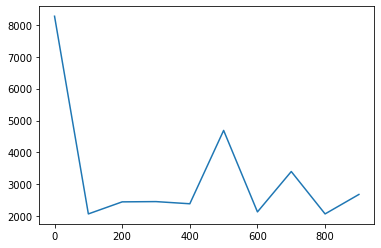

In [172]:
# stochastic gradient descent


cost_list =[]
epochs_list = []
def batch_gradient_descent(X,Y_true , epochs  ,learning_rate =0.01):
    number_of_features = X.shape[1]
    
    w= np.ones(shape = (number_of_features))
    b=0
    n = len(X)
    
    
    
    for i in range(epochs):
        random_index  = random.randint(0,n-1)
        sample_x =X[random_index]
        sample_y =Y_true[random_index]
        Y_pred = np.dot(w ,sample_x.T)+b
        
        w_grad = -(2/n)*(sample_x.T.dot(sample_y-Y_pred))
        b_grad = -(2/n)*np.sum(sample_y-Y_pred)
        
        w =w-learning_rate*w_grad
        b =b-learning_rate*b_grad

        cost = np.mean(np.square(Y_true-Y_pred))
    
        if i%100==0: 
            print(cost)
            cost_list.append(cost)
            epochs_list.append(i)
            
    return w,b,cost
        
    
w , b ,cost= batch_gradient_descent(X_train ,Y_train ,1000,0.11)
plt.plot(epochs_list ,cost_list)

print(w , b ,cost)




[33.27550636 33.8565536 ] 40.210975316683 1116.3729879460145


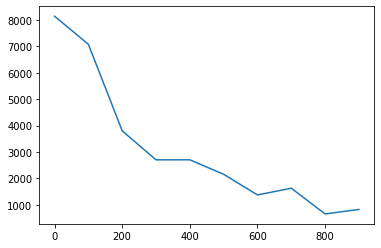

In [205]:
# mini batch gradient descent


cost_list =[]
epochs_list = []
def mini_batch_gradient_descent(X,Y_true , epochs  ,learning_rate =0.01):
    number_of_features = X.shape[1]
    
    w= np.ones(shape = (number_of_features))
    b=0
    n = len(X)
    
    
    
    for i in range(epochs):
        random_range  = random.sample(range(0,n) , max(1,n-4))
        sample_x =X[random_range]
        sample_y =Y_true[random_range]
        Y_pred = np.dot(w ,sample_x.T)+b
        
        w_grad = -(2/n)*(sample_x.T.dot(sample_y-Y_pred))
        b_grad = -(2/n)*np.sum(sample_y-Y_pred)
        
        w =w-learning_rate*w_grad
        b =b-learning_rate*b_grad

        cost = np.mean(np.square(sample_y-Y_pred))
    
        if i%100==0: 
            cost_list.append(cost)
            epochs_list.append(i)
            
    return w,b,cost
        
    
w , b ,cost= mini_batch_gradient_descent(X_train ,Y_train ,1000,0.001)
plt.plot(epochs_list ,cost_list)

print(w , b ,cost)

# random.sample(range(0,10) , max(1,10-4))

